In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('MAX_positive_estimated_responses.txt')

In [3]:
df.head()

,Subj,Type,Time,ROI,beta,var,TRAIT,STATE
0,MAX101,threat,0.00,ACC,-0.0890,0.0037,27,22
1,MAX101,threat,1.25,ACC,-0.1824,0.0047,27,22
2,MAX101,threat,2.50,ACC,-0.1772,0.0055,27,22
3,MAX101,threat,3.75,ACC,-0.1485,0.0058,27,22
4,MAX101,threat,5.00,ACC,-0.1027,0.0061,27,22


In [4]:
covs = df[['Subj','TRAIT','STATE']]
covs.drop_duplicates(inplace=True)
covs.set_index('Subj',inplace=True)

df.drop(['TRAIT','STATE'],axis=1,inplace=True)

print(covs.head())
print(df.head())

        TRAIT  STATE
Subj                
MAX101     27     22
MAX102     47     44
MAX103     33     32
MAX104     24     21
MAX105     56     28
     Subj    Type  Time  ROI    beta     var
0  MAX101  threat  0.00  ACC -0.0890  0.0037
1  MAX101  threat  1.25  ACC -0.1824  0.0047
2  MAX101  threat  2.50  ACC -0.1772  0.0055
3  MAX101  threat  3.75  ACC -0.1485  0.0058
4  MAX101  threat  5.00  ACC -0.1027  0.0061


/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
covs = pd.DataFrame(ss.fit_transform(covs),columns=covs.columns,index=covs.index)
covs.reset_index(inplace=True)
covs.head()

,Subj,TRAIT,STATE
0,MAX101,-1.190995,-1.037120
1,MAX102,1.267833,1.520902
2,MAX103,-0.453346,0.125617
3,MAX104,-1.559819,-1.153394
4,MAX105,2.374305,-0.339478


In [6]:
def phase(time):
    if (time >= 2.5 and time <= 8.75):
        return 'early'
    elif (time >= 10 and time <= 16.25):
        return 'late'
    else:
        return np.nan

In [7]:
df['Phase'] = df['Time'].apply(phase)
df.dropna(inplace=True)

In [8]:
df.head()

,Subj,Type,Time,ROI,beta,var,Phase
2,MAX101,threat,2.50,ACC,-0.1772,0.0055,early
3,MAX101,threat,3.75,ACC,-0.1485,0.0058,early
4,MAX101,threat,5.00,ACC,-0.1027,0.0061,early
5,MAX101,threat,6.25,ACC,-0.1354,0.0063,early
6,MAX101,threat,7.50,ACC,-0.2142,0.0064,early


In [9]:
def combine_beta(row):
    beta = row.iloc[:,0]
    var = row.iloc[:,1]
    weights = 1/var
    combined_beta = np.sum(weights*beta)/np.sum(weights)
    combined_var = 1/np.sum(weights)
    return combined_beta , combined_var

In [10]:
agg_df = df.groupby(['Subj','Type','ROI','Phase'])[['beta','var']].apply(combine_beta)

In [11]:
agg_df = agg_df.to_frame(name=('betavar')).reset_index()

In [12]:
agg_df[['beta', 'var']] = pd.DataFrame(agg_df['betavar'].tolist(), index=agg_df.index)

In [13]:
agg_df.drop('betavar',axis=1,inplace=True)

In [14]:
agg_df = agg_df.merge(covs)

In [15]:
agg_df.head()

,Subj,Type,ROI,Phase,beta,var,TRAIT,STATE
0,MAX101,safe,ACC,early,-0.135865,0.001079,-1.190995,-1.03712
1,MAX101,safe,ACC,late,-0.251833,0.001074,-1.190995,-1.03712
2,MAX101,safe,Left AntDorsal Insula,early,-0.082099,0.000961,-1.190995,-1.03712
3,MAX101,safe,Left AntDorsal Insula,late,-0.079520,0.000939,-1.190995,-1.03712
4,MAX101,safe,Left AntVentral Insula,early,-0.121539,0.001775,-1.190995,-1.03712


In [16]:
agg_df.to_csv('MAX_positive_estimated_responses.txt',sep=',',float_format='%.6f',index=False)

In [17]:
agg_df['TvsS'] = agg_df['Type'].apply(lambda a: -0.5 if a=='safe' else 0.5)
agg_df['LvsE'] = agg_df['Phase'].apply(lambda a: -0.5 if a=='early' else 0.5)

In [18]:
agg_df.head()

,Subj,Type,ROI,Phase,beta,var,TRAIT,STATE,TvsS,LvsE
0,MAX101,safe,ACC,early,-0.135865,0.001079,-1.190995,-1.03712,-0.5,-0.5
1,MAX101,safe,ACC,late,-0.251833,0.001074,-1.190995,-1.03712,-0.5,0.5
2,MAX101,safe,Left AntDorsal Insula,early,-0.082099,0.000961,-1.190995,-1.03712,-0.5,-0.5
3,MAX101,safe,Left AntDorsal Insula,late,-0.079520,0.000939,-1.190995,-1.03712,-0.5,0.5
4,MAX101,safe,Left AntVentral Insula,early,-0.121539,0.001775,-1.190995,-1.03712,-0.5,-0.5


In [19]:
import seaborn as sns

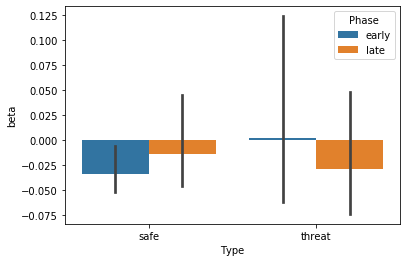

In [21]:
sns.barplot(x='Type',y='beta',hue='Phase',data=agg_df)

(-0.5, 0.5)

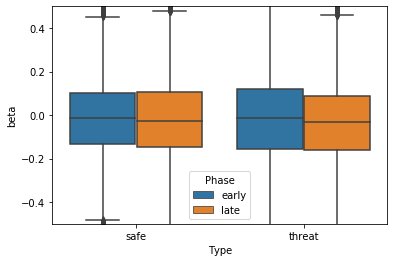

In [21]:
sns.boxplot(x='Type',y='beta',hue='Phase',data=agg_df)
plt.ylim(-0.5,0.5)